# Title: "Exam Performance"
# Author: "A.S., D.O."
# Date: "December 5, 2018"

## Dataset 


This dataset found on kaggle was pulled from this website. It is theoretically "exam scores for students at a public school". However, there is an interesting disclaimer at the end that says "All data sets are fictional and should be used for educational purposes only." : http://roycekimmons.com/tools/generated_data/exams


## Install Packages

In [1]:
install.packages("tidyverse")
install.packages("dplyr")
install.packages("UsingR", dependencies=TRUE)

Installing package into 'C:/Users/denni/Documents/R/win-library/3.6'
(as 'lib' is unspecified)


package 'tidyverse' successfully unpacked and MD5 sums checked


ERROR: Error in unpackPkgZip(foundpkgs[okp, 2L], foundpkgs[okp, 1L], lib, libs_only, : ERROR: failed to lock directory 'C:\Users\denni\Documents\R\win-library\3.6' for modifying
Try removing 'C:\Users\denni\Documents\R\win-library\3.6/00LOCK'


## Package Load

In [3]:
library(dplyr)
library(ggplot2)

## Load Data

In [4]:
full <- read.csv("StudentsPerformance.csv", header = TRUE)

In [5]:
full <- read.csv("StudentsPerformance.csv", header = TRUE)
dim(full)
head(full)
str(full)

[1] 1000    8

gender,race.ethnicity,parental.level.of.education,lunch,test.preparation.course,math.score,reading.score,writing.score
female,group B,bachelor's degree,standard,none,72,72,74
female,group C,some college,standard,completed,69,90,88
female,group B,master's degree,standard,none,90,95,93
male,group A,associate's degree,free/reduced,none,47,57,44
male,group C,some college,standard,none,76,78,75
female,group B,associate's degree,standard,none,71,83,78


'data.frame':	1000 obs. of  8 variables:
 $ gender                     : Factor w/ 2 levels "female","male": 1 1 1 2 2 1 1 2 2 1 ...
 $ race.ethnicity             : Factor w/ 5 levels "group A","group B",..: 2 3 2 1 3 2 2 2 4 2 ...
 $ parental.level.of.education: Factor w/ 6 levels "associate's degree",..: 2 5 4 1 5 1 5 5 3 3 ...
 $ lunch                      : Factor w/ 2 levels "free/reduced",..: 2 2 2 1 2 2 2 1 1 1 ...
 $ test.preparation.course    : Factor w/ 2 levels "completed","none": 2 1 2 2 2 2 1 2 1 2 ...
 $ math.score                 : int  72 69 90 47 76 71 88 40 64 38 ...
 $ reading.score              : int  72 90 95 57 78 83 95 43 64 60 ...
 $ writing.score              : int  74 88 93 44 75 78 92 39 67 50 ...


So it doesn't seem like this dataset is too big. It's a smaller sample, relatively speaking. 1000 isn't a copious amount.

We've got 5 indicators about people, their gender, their race (as described in a group, we don't know which correlate to which), their parents' level of education, their lunch situation (probably pointing to their financial situation), and whether they did a test prep course.



To analyze, we have their writing, reading, and math scores.

Null Hypothesis: There is no correction between total average exams and these co-variates.

Alternative Hypothesis: At least one co-variable Correlates with total average exams.

## Select Data

In [6]:
math_score <- full$math.score
ave_math <- mean(math_score)
reading_score <- full$reading.score
ave_reading <- mean(reading_score)
writing_score <- full$writing.score
ave_writing <- mean(writing_score)
levels(full$gender)
levels(full$race.ethnicity)
levels(full$parental.level.of.education)
levels(full$lunch)
levels(full$test.preparation.course)
all_exams <- ((math_score+reading_score+writing_score)/3)
full2 <- mutate(full,mean_exams = all_exams)
head(full2)

[1] "female" "male"

[1] "group A" "group B" "group C" "group D" "group E"

[1] "associate's degree" "bachelor's degree"  "high school"       
[4] "master's degree"    "some college"       "some high school"

[1] "free/reduced" "standard"

[1] "completed" "none"

gender,race.ethnicity,parental.level.of.education,lunch,test.preparation.course,math.score,reading.score,writing.score,mean_exams
female,group B,bachelor's degree,standard,none,72,72,74,72.66667
female,group C,some college,standard,completed,69,90,88,82.33333
female,group B,master's degree,standard,none,90,95,93,92.66667
male,group A,associate's degree,free/reduced,none,47,57,44,49.33333
male,group C,some college,standard,none,76,78,75,76.33333
female,group B,associate's degree,standard,none,71,83,78,77.33333


## Highest Scores and Lowest scores

In [7]:
#Math
i_mathmin <- which.min(math_score)
full$lunch[i_mathmin]
full$parental.level.of.education[i_mathmin]
full$test.preparation.course[i_mathmin]
full$gender[i_mathmin]
i_mathmax <- which.max(math_score)
full$lunch[i_mathmax]
full$parental.level.of.education[i_mathmax]
full$test.preparation.course[i_mathmax]
full$gender[i_mathmax]

[1] free/reduced
Levels: free/reduced standard

[1] some high school
6 Levels: associate's degree bachelor's degree high school ... some high school

[1] none
Levels: completed none

[1] female
Levels: female male

[1] free/reduced
Levels: free/reduced standard

[1] associate's degree
6 Levels: associate's degree bachelor's degree high school ... some high school

[1] completed
Levels: completed none

[1] male
Levels: female male

In [8]:
#Reading
i_readmin <- which.min(reading_score)
full$lunch[i_readmin]
full$parental.level.of.education[i_readmin]
full$test.preparation.course[i_readmin]
full$gender[i_readmin]
i_readmax <- which.max(reading_score)
full$lunch[i_readmax]
full$parental.level.of.education[i_readmax]
full$test.preparation.course[i_readmax]
full$gender[i_readmax]

[1] free/reduced
Levels: free/reduced standard

[1] some high school
6 Levels: associate's degree bachelor's degree high school ... some high school

[1] none
Levels: completed none

[1] female
Levels: female male

[1] standard
Levels: free/reduced standard

[1] master's degree
6 Levels: associate's degree bachelor's degree high school ... some high school

[1] none
Levels: completed none

[1] female
Levels: female male

In [9]:
#Writing
i_writemin <- which.min(writing_score)
full$lunch[i_writemin]
full$parental.level.of.education[i_writemin]
full$test.preparation.course[i_writemin]
full$gender[i_writemin]
i_writemax <- which.max(writing_score)
full$lunch[i_writemax]
full$parental.level.of.education[i_writemax]
full$test.preparation.course[i_writemax]
full$gender[i_writemax]

[1] free/reduced
Levels: free/reduced standard

[1] some high school
6 Levels: associate's degree bachelor's degree high school ... some high school

[1] none
Levels: completed none

[1] female
Levels: female male

[1] standard
Levels: free/reduced standard

[1] master's degree
6 Levels: associate's degree bachelor's degree high school ... some high school

[1] none
Levels: completed none

[1] female
Levels: female male

In [10]:
#Average for all exams
i_examsmin <- which.min(all_exams)
full2$lunch[i_examsmin]
full2$parental.level.of.education[i_examsmin]
full2$test.preparation.course[i_examsmin]
full2$gender[i_examsmin]
i_examsmax <- which.max(all_exams)
full2$lunch[i_examsmax]
full2$parental.level.of.education[i_examsmax]
full2$test.preparation.course[i_examsmax]
full2$gender[i_examsmax]

[1] free/reduced
Levels: free/reduced standard

[1] some high school
6 Levels: associate's degree bachelor's degree high school ... some high school

[1] none
Levels: completed none

[1] female
Levels: female male

[1] standard
Levels: free/reduced standard

[1] bachelor's degree
6 Levels: associate's degree bachelor's degree high school ... some high school

[1] none
Levels: completed none

[1] female
Levels: female male

## Graph

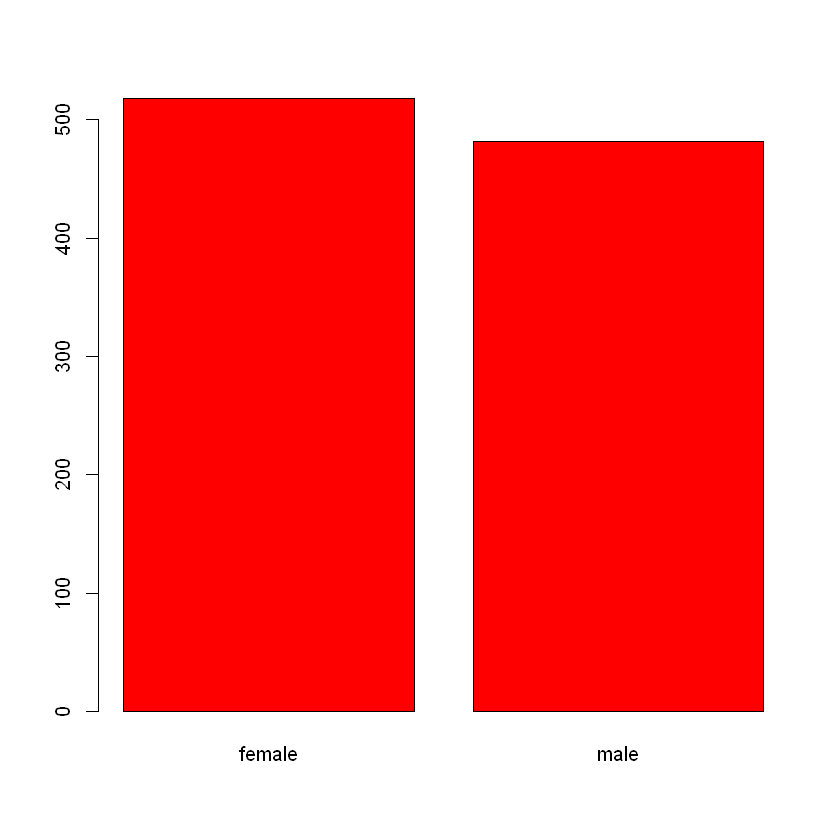

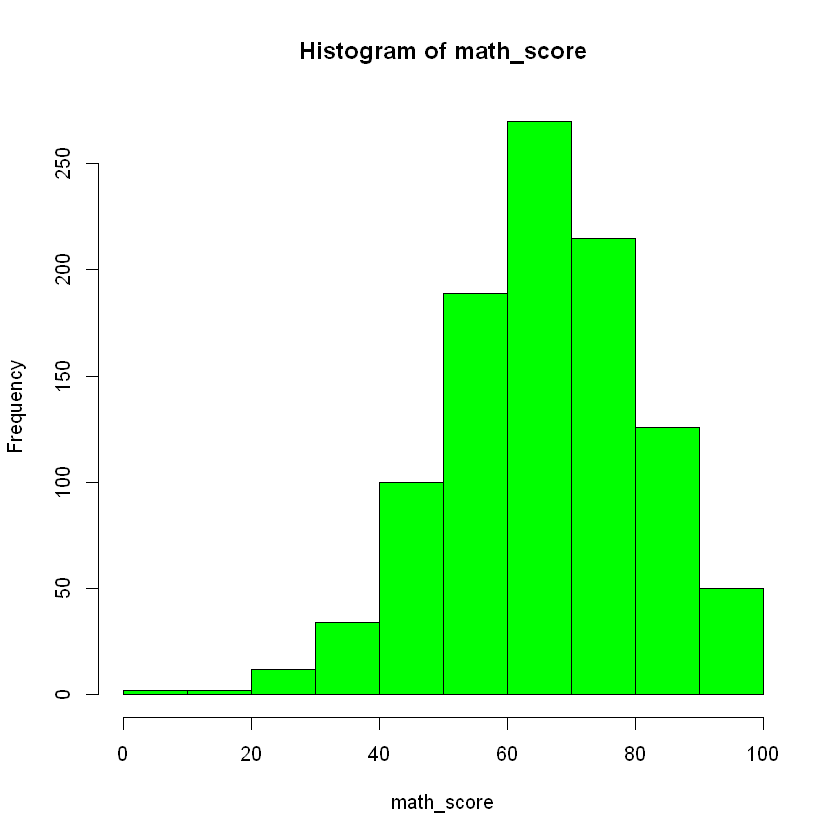

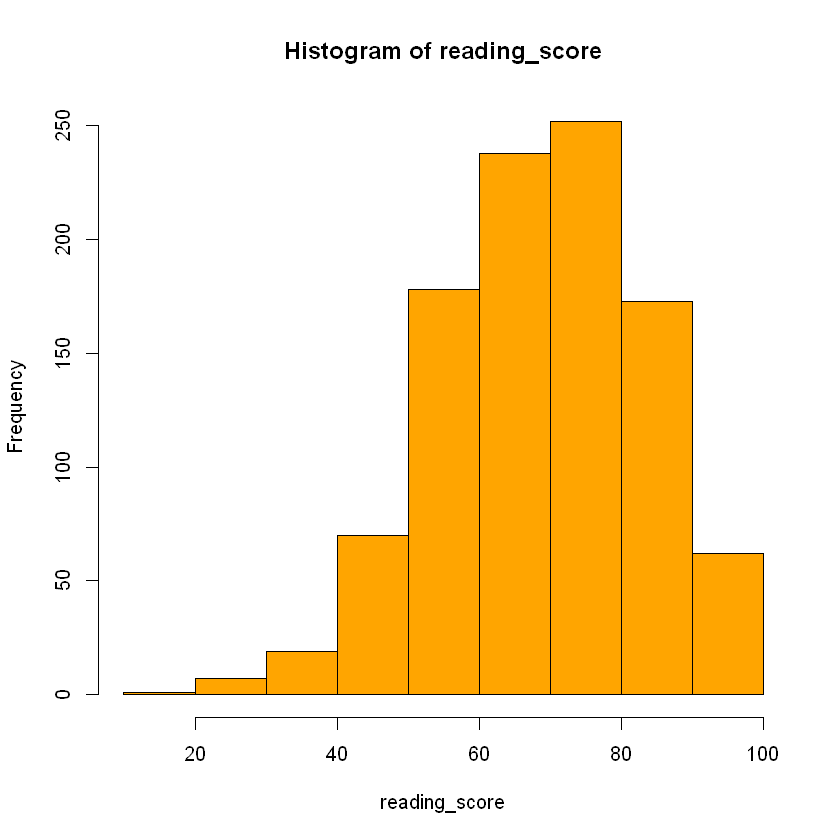

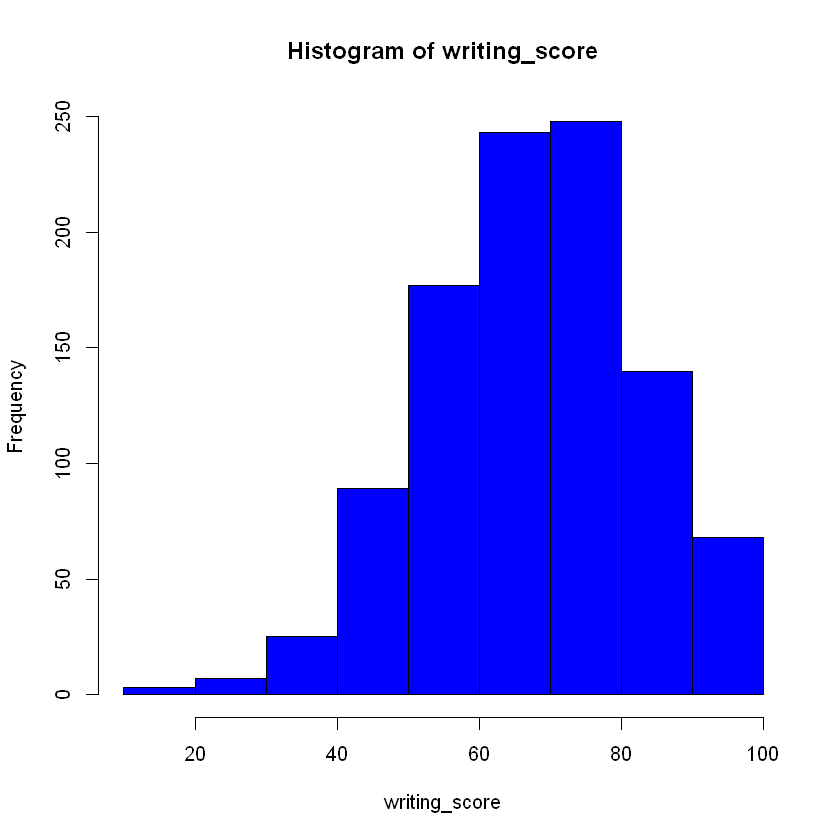

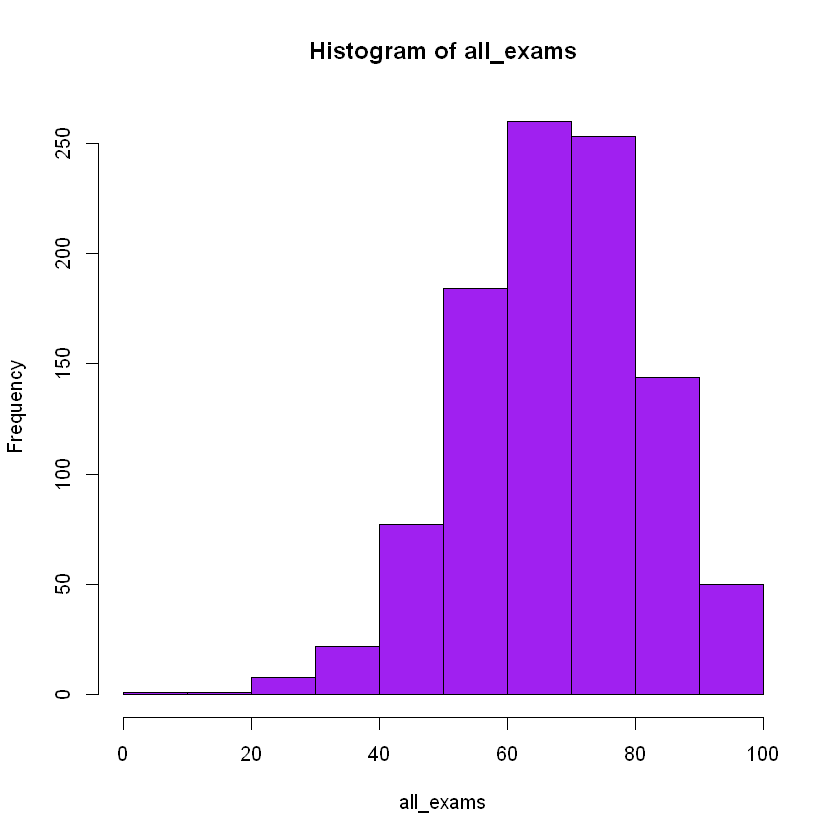

In [11]:
table(full$gender) %>% barplot(col = "red")
hist(math_score, col = "green")
hist(reading_score, col = "orange")
hist(writing_score, col = "blue")
hist(all_exams, col = "purple")


All the histograms are left skewed.

## Comparing student's lunch situation with their math scores 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.00   57.00   66.00   66.09   77.00  100.00 

[1] 20

[1] 15.16308


	Welch Two Sample t-test

data:  math_score by full2$lunch
t = -11.484, df = 667.5, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -13.01305  -9.21291
sample estimates:
mean in group free/reduced     mean in group standard 
                  58.92113                   70.03411 


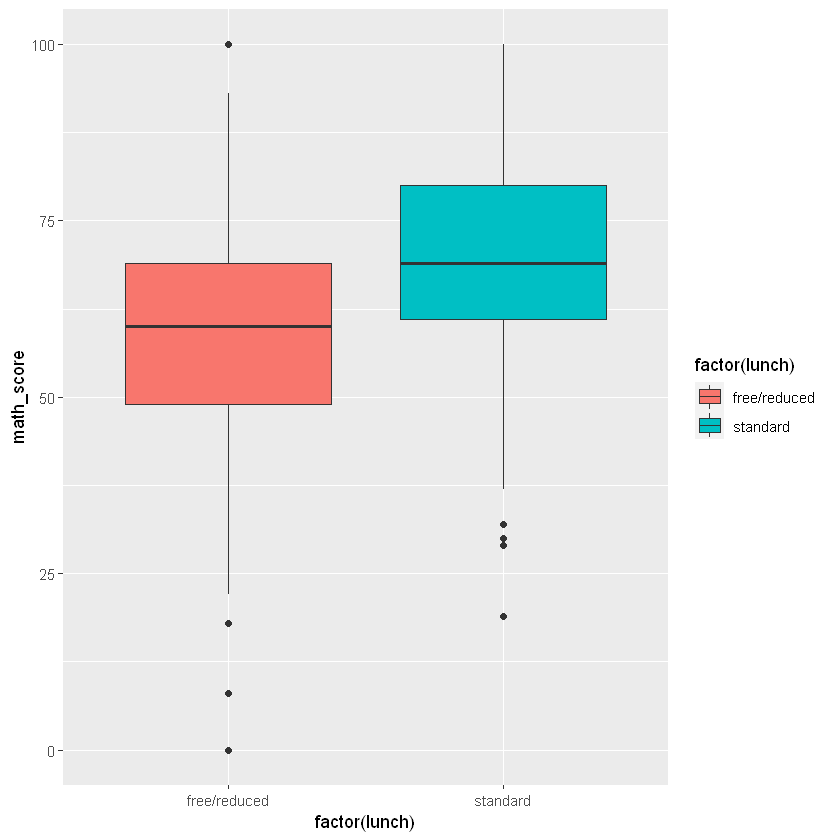

In [12]:
ggplot(data = full) + 
  geom_boxplot(mapping = aes(x = factor(lunch), y = math_score, 
                             fill = factor(lunch)))
summary(math_score)
IQR(math_score)
sd(math_score)
t.test(math_score~full2$lunch)

## Comparing student's lunch situation with their reading scores

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  17.00   59.00   70.00   69.17   79.00  100.00 

[1] 20

[1] 14.60019


	Welch Two Sample t-test

data:  reading_score by full2$lunch
t = -7.2926, df = 684.9, p-value = 8.422e-13
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -8.885594 -5.115891
sample estimates:
mean in group free/reduced     mean in group standard 
                  64.65352                   71.65426 


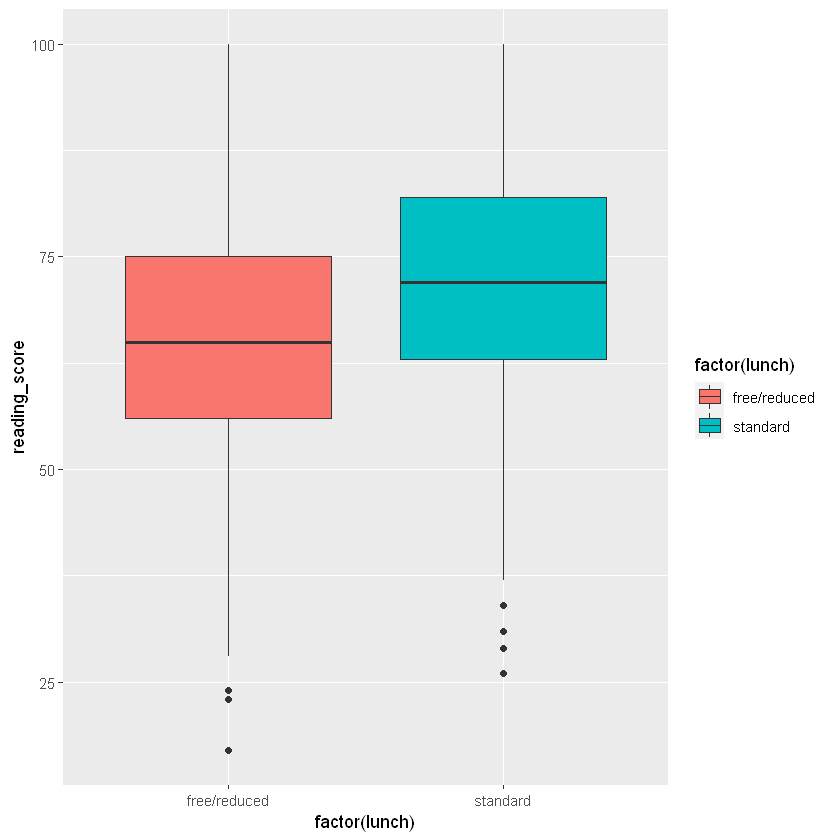

In [13]:
ggplot(data = full) + 
  geom_boxplot(mapping = aes(x = factor(lunch), y = reading_score, 
                             fill = factor(lunch)))
summary(reading_score)
IQR(reading_score)
sd(reading_score)
t.test(reading_score~full2$lunch)

## Comparing student's lunch situation with their writing scores

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  10.00   57.75   69.00   68.05   79.00  100.00 

[1] 21.25

[1] 15.19566


	Welch Two Sample t-test

data:  writing_score by full2$lunch
t = -7.8409, df = 685.25, p-value = 1.716e-14
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -9.754100 -5.847342
sample estimates:
mean in group free/reduced     mean in group standard 
                  63.02254                   70.82326 


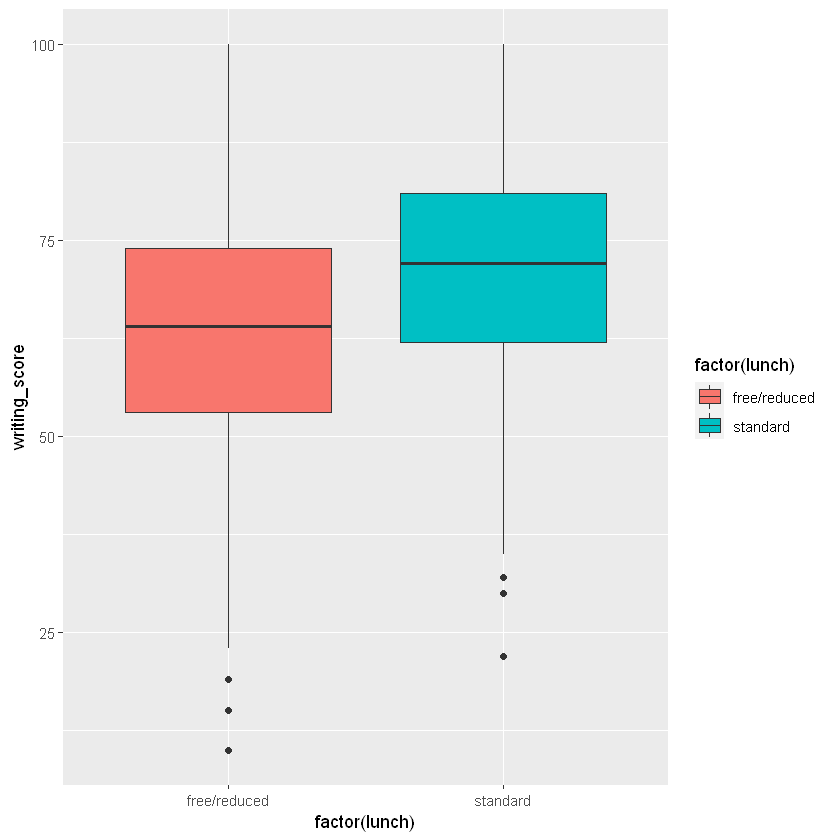

In [14]:
ggplot(data = full) + 
  geom_boxplot(mapping = aes(x = factor(lunch), y = writing_score, 
                             fill = factor(lunch)))
summary(writing_score)
IQR(writing_score)
sd(writing_score)
t.test(writing_score~full2$lunch)

## Comparing student's lunch situation with their all average exams scores

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   9.00   58.33   68.33   67.77   77.67  100.00 

[1] 19.33333

[1] 14.25733


	Welch Two Sample t-test

data:  all_exams by full2$lunch
t = -9.3232, df = 674.61, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -10.457360  -6.818936
sample estimates:
mean in group free/reduced     mean in group standard 
                  62.19906                   70.83721 


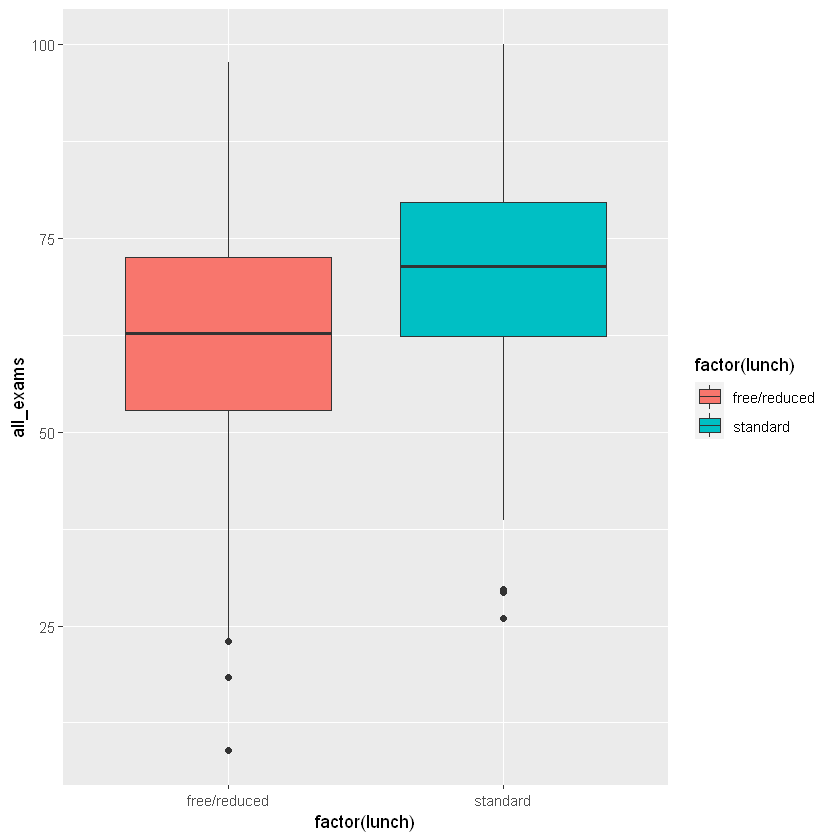

In [15]:
ggplot(data = full2) + 
  geom_boxplot(mapping = aes(x = factor(lunch), y = all_exams, 
                             fill = factor(lunch)))
summary(all_exams)
IQR(all_exams)
sd(all_exams)
t.test(all_exams~full2$lunch)

## Comparing student's test preparation course with their all average exams scores

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   9.00   58.33   68.33   67.77   77.67  100.00 

[1] 19.33333

[1] 14.25733


	Welch Two Sample t-test

data:  all_exams by full2$test.preparation.course
t = 8.5945, df = 791.84, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 5.887734 9.373305
sample estimates:
mean in group completed      mean in group none 
               72.66946                65.03894 


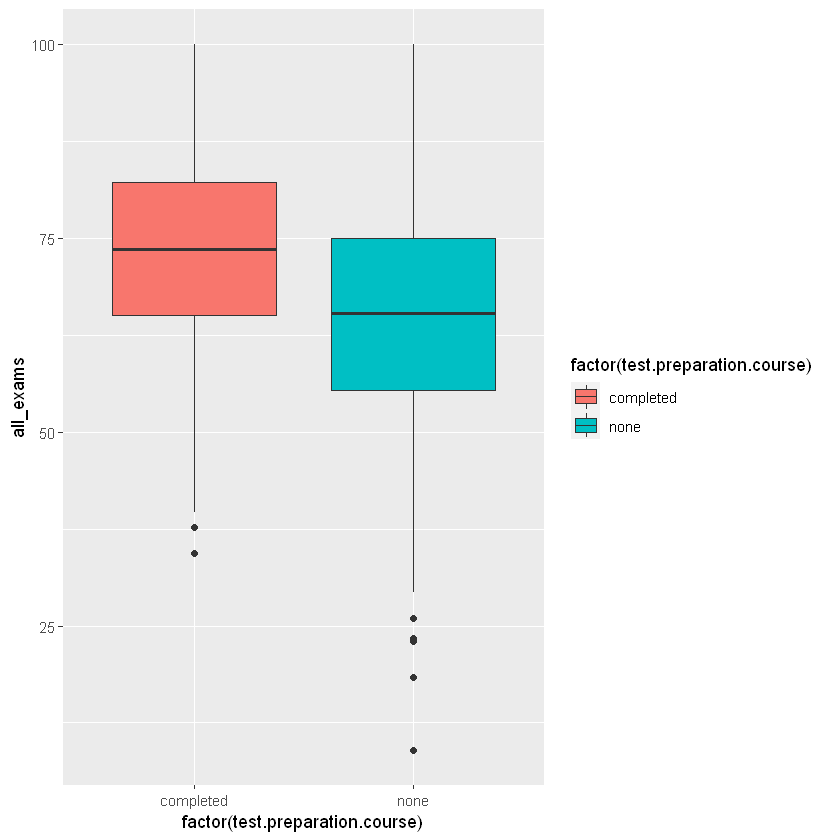

In [16]:
ggplot(data = full2) + 
  geom_boxplot(mapping = aes(x = factor(test.preparation.course), y = all_exams, 
                             fill = factor(test.preparation.course)))
summary(all_exams)
IQR(all_exams)
sd(all_exams)
t.test(all_exams~full2$test.preparation.course)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   9.00   58.33   68.33   67.77   77.67  100.00 

[1] 19.33333

[1] 14.25733

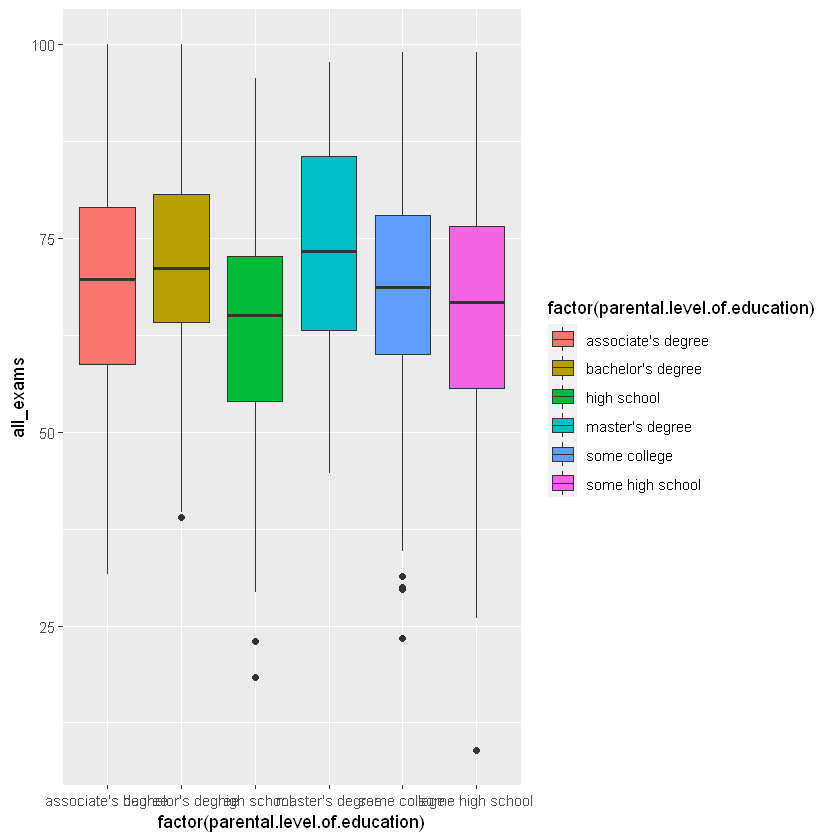

In [17]:
ggplot(data = full2) + 
  geom_boxplot(mapping = aes(x = factor(parental.level.of.education), y = all_exams, 
                             fill = factor(parental.level.of.education)))
summary(all_exams)
IQR(all_exams)
sd(all_exams)

Therefore, we reject the null hypothesis. We know that lunch situations and test preparation courses are correlates with student exams score. We aren't sure if the students' parents education correlate with the exams. 
